# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [32]:
!pip install mysql-connector-python
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [42]:
con = mysql.connector.connect(user='root', password='ukeobr88',
                              host='127.0.0.1',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [43]:
cursor = con.cursor()
cursor.execute("SELECT MAX(hire_date), MIN(hire_date) FROM employees")
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП. 

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [59]:
import pandas as pd

sql_query = """
    SELECT emp_no, salary, from_date, to_date
    FROM salaries
    WHERE (emp_no, from_date) IN (
        SELECT emp_no, MAX(from_date) 
        FROM salaries 
        GROUP BY emp_no
    )
"""
cursor.execute(sql_query)
result = cursor.fetchall()

columns = ['emp_no', 'salary', 'from_date', 'to_date']

res = pd.DataFrame(result, columns=columns)

print("Назви колонок в змінній res:")
print(res.columns)

print("\nРозмір датафрейму:")
print(res.shape)

print("\nПерші 3 записи датафрейму:")
print(res.head(3))

Назви колонок в змінній res:
Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

Розмір датафрейму:
(300024, 4)

Перші 3 записи датафрейму:
   emp_no  salary   from_date     to_date
0   10001   88958  2002-06-22  9999-01-01
1   10002   72527  2001-08-02  9999-01-01
2   10003   43311  2001-12-01  9999-01-01


In [60]:
field_names = [i[0] for i in cursor.description]

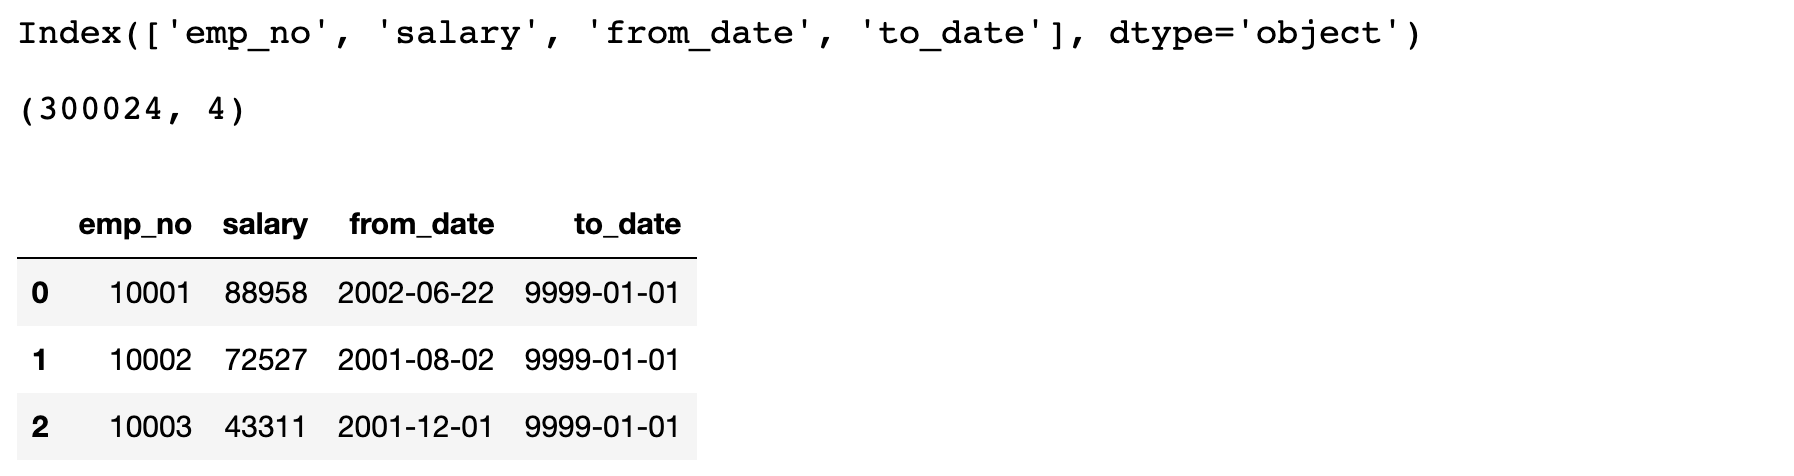

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [62]:
to_date_dtype = res['to_date'].dtype

to_date_equals_9999 = (res['to_date'] == '9999-01-01').sum()
to_date_not_equals_9999 = (res['to_date'] != '9999-01-01').sum()

print(f"Number of 'to_date' values equal to '9999-01-01': {to_date_equals_9999}")
print(f"Number of 'to_date' values not equal to '9999-01-01': {to_date_not_equals_9999}")

Number of 'to_date' values equal to '9999-01-01': 0
Number of 'to_date' values not equal to '9999-01-01': 300024


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

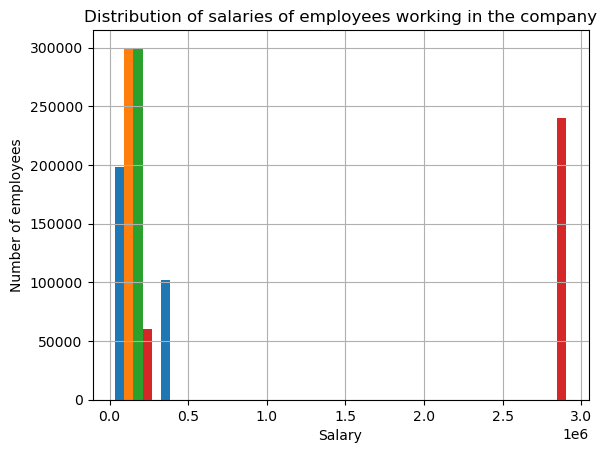

In [72]:
import matplotlib.pyplot as plt

salary_data = res

plt.hist(salary_data, bins=10)

plt.xlabel('Salary')
plt.ylabel('Number of employees')
plt.title('Distribution of salaries of employees working in the company')
plt.grid(True)

plt.show()

7.Виведіть кількість співробітників за роком, в який вони були найняті (`hire_date`) використовуючи `pandas.read_sql`. Запишіть результат в змінну `df` та виведіть значення змінної на екран.

In [64]:
sql_query = """
SELECT EXTRACT(YEAR FROM hire_date) AS hire_year,
       COUNT(*) AS employee_num
FROM employees
GROUP BY hire_year
ORDER BY hire_year;
"""

df = pd.read_sql(sql_query, con)

print(df)

C:\Users\yhlushchyk\AppData\Local\Temp\ipykernel_4004\2361462639.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, con)


    hire_year  employee_num
0        1985         35316
1        1986         36150
2        1987         33501
3        1988         31436
4        1989         28394
5        1990         25610
6        1991         22568
7        1992         20402
8        1993         17772
9        1994         14835
10       1995         12115
11       1996          9574
12       1997          6669
13       1998          4155
14       1999          1514
15       2000            13


Очікуваний результат:

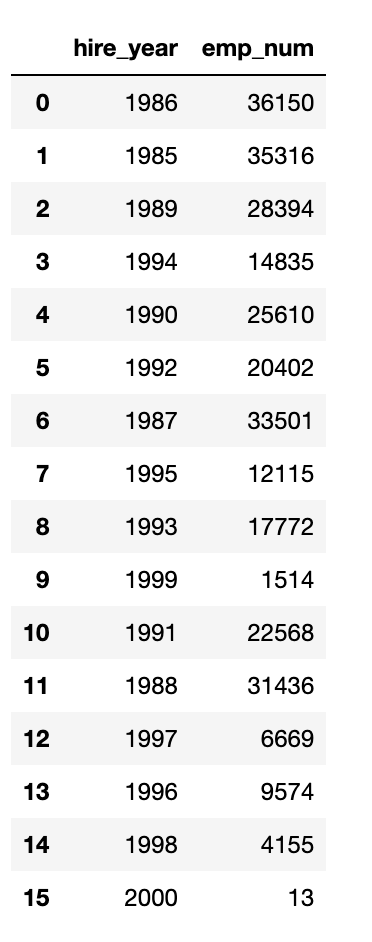

8.Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

C:\Users\yhlushchyk\AppData\Local\Temp\ipykernel_4004\1914948271.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, con)


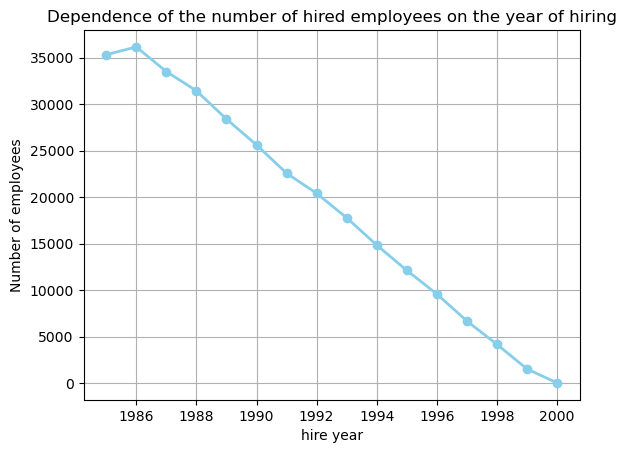

In [65]:
import matplotlib.pyplot as plt

sql_query = """
SELECT EXTRACT(YEAR FROM hire_date) AS hire_year,
       COUNT(*) AS employee_count
FROM employees
GROUP BY hire_year
ORDER BY hire_year;
"""

df = pd.read_sql(sql_query, con)

df.rename(columns={"hire_year": "Year", "employee_count": "Number of Employees Hired"}, inplace=True)

df.sort_values(by="Year", ascending=True, inplace=True)

plt.plot(df["Year"], df["Number of Employees Hired"], marker='o', color='skyblue', linestyle='-', linewidth=2)

plt.xlabel('hire year')
plt.ylabel('Number of employees')
plt.title('Dependence of the number of hired employees on the year of hiring')
plt.grid(True)

plt.show()

Очікуваний результат:

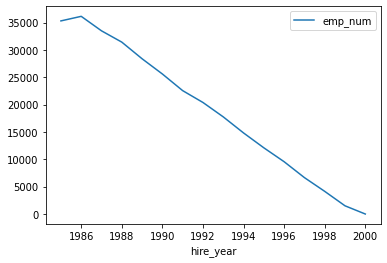

9.З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [66]:
sql_query = """
SELECT emp.emp_no,
       from_date,
       to_date,
       t.title,
       timestampdiff(year, t.from_date, t.to_date) AS years_on_position
FROM employees emp
JOIN titles t ON emp.emp_no = t.emp_no
WHERE t.title = 'Engineer' AND t.to_date != '9999-01-01';
"""

df_years = pd.read_sql(sql_query, con)

print(df_years)

C:\Users\yhlushchyk\AppData\Local\Temp\ipykernel_4004\438181630.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql(sql_query, con)


       emp_no   from_date     to_date     title  years_on_position
0       10004  1986-12-01  1995-12-01  Engineer                  9
1       10009  1990-02-18  1995-02-18  Engineer                  5
2       10012  1992-12-18  2000-12-18  Engineer                  8
3       10018  1987-04-03  1995-04-03  Engineer                  8
4       10026  1995-03-20  2001-03-19  Engineer                  5
...       ...         ...         ...       ...                ...
84015  499972  1989-11-23  1998-11-23  Engineer                  9
84016  499984  1989-07-30  1994-07-30  Engineer                  5
84017  499994  1993-02-22  1993-10-27  Engineer                  0
84018  499996  1996-05-13  2002-05-13  Engineer                  6
84019  499997  1987-08-30  1992-08-29  Engineer                  4

[84020 rows x 5 columns]


Очікуваний результат:

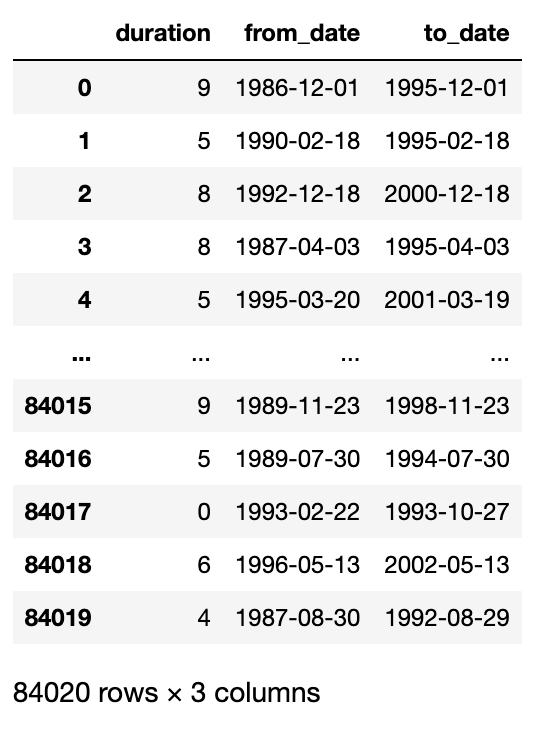

10.Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

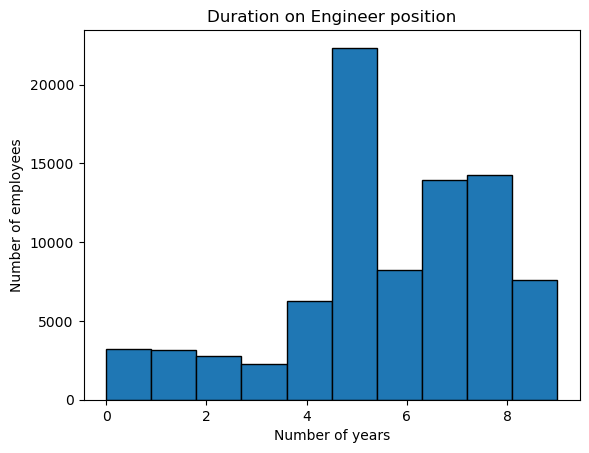

In [71]:
engineer_data = df_years[df_years['title'] == 'Engineer']

plt.hist(engineer_data['years_on_position'], bins=10, edgecolor='black')

plt.xlabel('Number of years')
plt.ylabel('Number of employees')
plt.title('Duration on Engineer position')

plt.show()

Очікуваний результат:

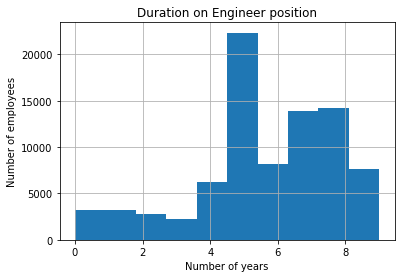

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [73]:
con.close()